<a href="https://colab.research.google.com/github/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Bootcamp_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caderno de exploração dos dados do datasus 2008 pra frente


In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("/content/A104831189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows=3, sep = ";", skipfooter=12,
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9308601.23,11954489.94,11887993.85,10328280.19,8068024.57,9486450.48,9012840.42,9855249.57,9770992.43,14740022.40,15347858.07,16236293.19,15143679.18,12498710.53,10951319.46,1.073782e+09
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,4.752903e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13540590.64,19703025.18,21134874.24,19769752.76,18069587.18,17852221.73,16419160.70,19903821.77,17794528.56,21621697.26,26103808.87,23445832.76,23154039.32,26127701.15,26398054.09,24446286.12,21752718.52,2.041004e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888.58,2587642.41,1923440.17,2422446.17,24954

In [3]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86092502.24,1.005793e+08,1.026100e+08,1.044010e+08,1.174583e+08,1.088539e+08,1.117605e+08,1.200098e+08,1.119016e+08,1.343308e+08,1.445253e+08,1.473374e+08,1.515765e+08,1.534800e+08,137579124.29,1.350319e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17363192.43,1.885884e+07,1.987708e+07,1.924789e+07,1.949721e+07,2.202313e+07,1.979587e+07,2.197742e+07,2.531665e+07,2.609724e+07,2.695567e+07,2.888897e+07,3.434338e+07,3.167354e+07,36433854.87,2.485179e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15823328.54,15032737.51,15259436.50,15066106.66,1.490697e+07,12563655.61,13632848.78,13215428.53,1.683465e+07,1.970622e+07,2.074722e+07,2.272811e+07,2.069369e+07,1.997729e+07,1.948038e+07,1.906485e+07,2.428373e+07,3.093521e+07,3.178601e+07,3.295717e+07,3.803978e+07,36567362.69,2.356738e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.2

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 166 entries, Unidade da Federação to Total
dtypes: float64(163), object(3)
memory usage: 35.1+ KB


In [5]:
pd.options.display.float_format = "{:.2f}".format
media_meses = dados.mean()
media_meses

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Abr     72558458.73
2021/Mai     76781349.18
2021/Jun     80038897.67
2021/Jul     78895881.06
Total      6774438510.94
Length: 163, dtype: float64

In [6]:
dados["2008/Ago"]

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [7]:
dados["2008/Ago"].mean()

27800320.306666665

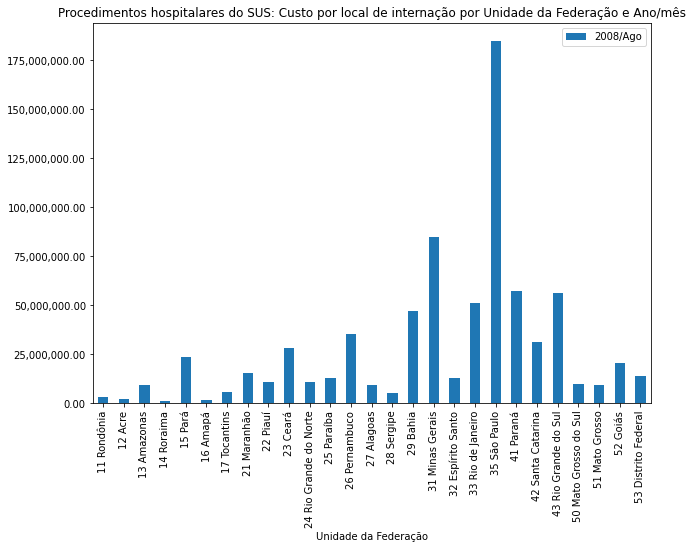

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2008/Ago",kind="bar", figsize=(10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
plt.show()

#Desafio: faça a mesma análise pro mês mais recente.

In [9]:
dados_ref = dados.replace('-', '0')
dados_ref = dados_ref.set_index("Unidade da Federação")
for i in dados_ref.columns:
  dados_ref[i] = dados_ref[i].astype(float)

dados_ref['2021/Ago'].mean()

69987437.27444446

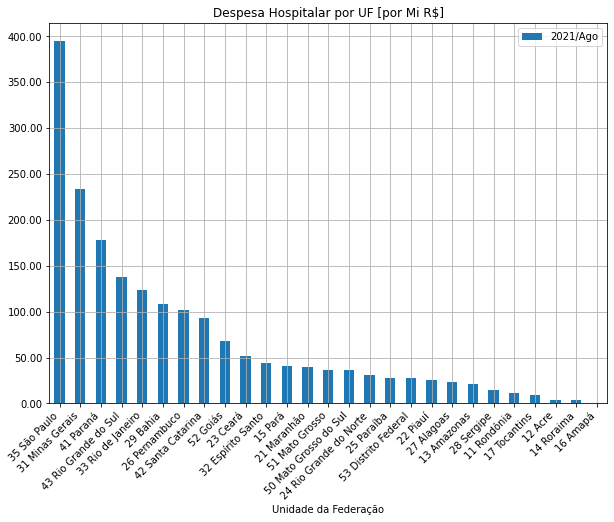

In [10]:
dados_ref_milhoes = dados_ref / 1e6
ax = dados_ref_milhoes.sort_values(by=['2021/Ago'], ascending = False).plot(
                                                                    y="2021/Ago",
                                                                    kind="bar", 
                                                                    figsize=(10,7),
                                                                    grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45, ha='right')
plt.title("Despesa Hospitalar por UF [por Mi R$]")
plt.show()

# Entendendo gráficos

In [11]:
dados2 = pd.read_csv("/content/A122541189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows=3, sep = ";", skipfooter=12,
                    thousands=".", decimal=",")
dados2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01,2048596.72,1073782138.81
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,475290315.34
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12,5780705.81,2041003727.86
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3531874.44,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3653281.61,3350272.96,2977820.70,1749906.81,349395453.66
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43336950.39,41046394.84,40533687.35,38864252.14,37003357.15,38507479.70,37228236.49,37925512.28,39040849.46,37112818.28,49596845.29,52394753.18,50486914.49,41805551.16,30176865.99,13008678.86,4950135530.02


In [12]:
dados2[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [13]:
dados2.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2021/Abr     77523160.28
2021/Mai     81401610.00
2021/Jun     67436298.31
2021/Jul     47452748.71
Total      6774431164.65
Length: 169, dtype: float64

In [14]:
colunas_usaveis = dados2.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [15]:
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01,1073782138.81
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,475290315.34
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12,2041003727.86
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.

In [16]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01,1073782138.81
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,475290315.34
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12,2041003727.86
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2844811.66,296

In [17]:
usaveis['2019/Ago'].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [18]:
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2021/Abr     5002272.59
2021/Mai     4326882.24
2021/Jun     3458187.11
2021/Jul     2302711.01
Total      475290315.34
Name: 12 Acre, Length: 169, dtype: float64

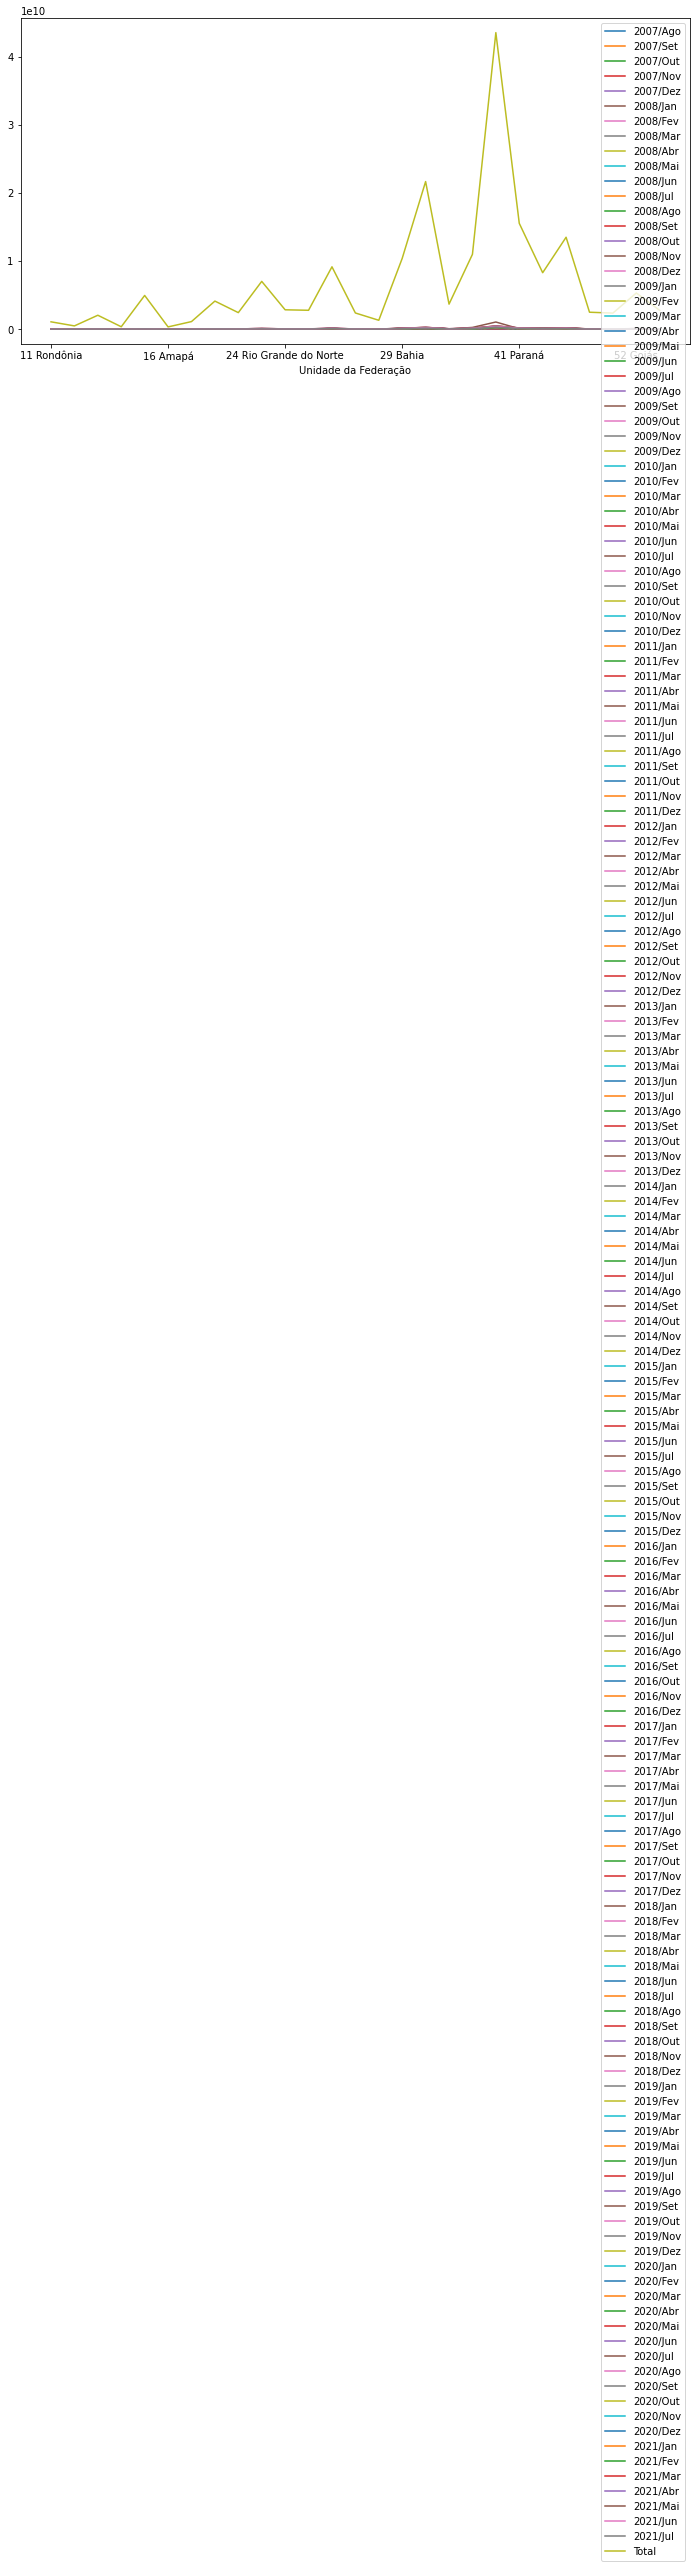

In [19]:
usaveis.plot(figsize=(12,6))

In [20]:
usaveis = usaveis.drop("Total", axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2721261.19,2844811

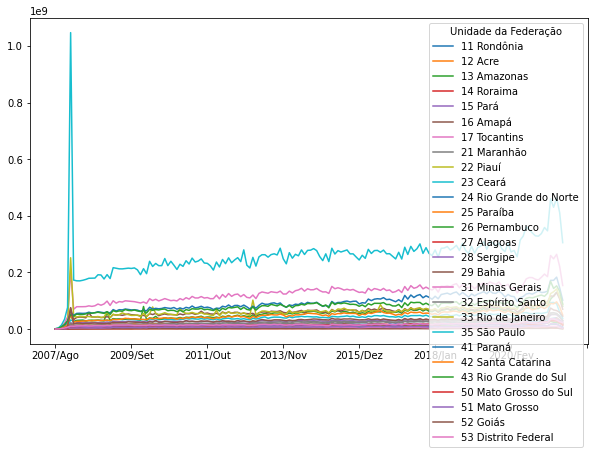

In [21]:
usaveis.T.plot(figsize=(10,6))

#Desafio: Reposicionar Legenda. Dentro? Fora? Onde?


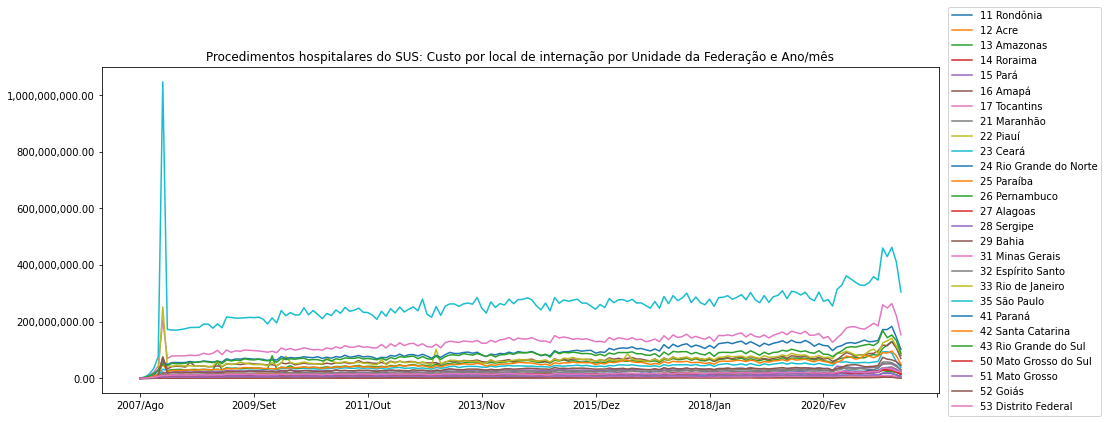

In [22]:
ax = usaveis.T.plot(figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
ax.legend(loc=1, bbox_to_anchor=(1.2, 1.2))
plt.show()

# Desafio 2: Selecionar 5 estados para plota-los

## Feito por Vitor

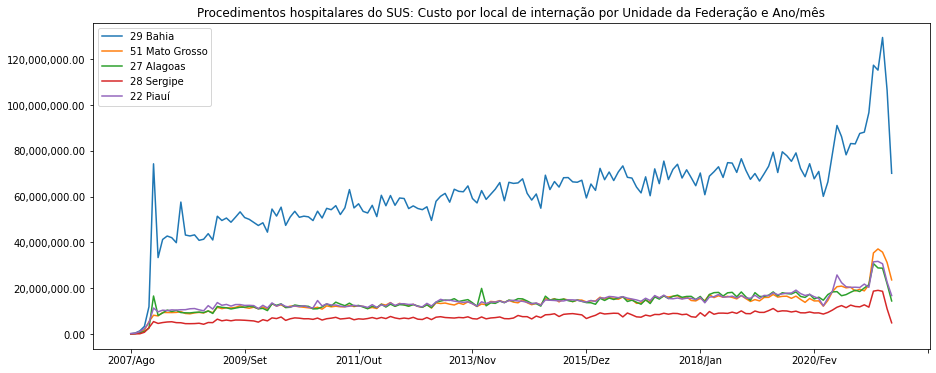

In [23]:
lista_estados = usaveis.index.tolist()
import random
CincoEstados = []
for i in range(0,5):
  n = random.choices(lista_estados)
  CincoEstados.append(n[0])

usaveis.T[CincoEstados]
ax = usaveis.T[CincoEstados].plot(figsize=(15,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
ax.legend(loc=2)
plt.show()

## Feito na aula

In [24]:
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [25]:
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [26]:
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

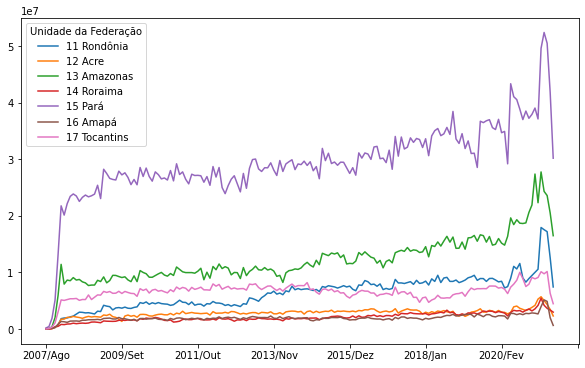

In [27]:
usaveis[:7].T.plot(figsize=(10,6))

In [28]:
import numpy as np
np.random.seed(687942)
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25983304.03,28690916.87,25936888.97,28550512.79,29319469.90,27519132.91,29788885.15,26294165.36,25250918.87,27615604.26,26601451.82,26689904.87,24003052.09,29290756.45,31972932.63,41934293.90,36405257.36,34820715.37,35249673.88,36364662.17,42256604.54,40664905.15,39529966.31,57568004.47,57934683.92,55638184.50,42933342.84,31538501.89
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206460383.96,70301089.50,79119005.51,79046322.41,79268070.12,79626793.50,82215689.64,80374117.08,82415611.96,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100266328.26,91831325.37,97289703.07,95723396.53,100050008.70,98995348.51,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105501032.97,99666115.96,103377831.80,107844259.69,104341138.19,100525403.88,101943625.50,...,150711186.69,153607663.82,150268981.79,156810300.19,160555585.84,146099653.28,157302905.14,148172783.99,145462168.90,153279085.45,142715419.43,151999837.70,157959772.67,163691633.12,154208258.12,166818341.72,161885848.63,157462480.85,166197376.39,152186016.11,152501118.26,158295477.44,141469843.08,147783983.53,127474564.42,142760459.40,157361944.69,177506208.89,182247003.24,181803356.92,176155629.67,173787241.10,183341457.10,194365821.13,185286622.03,259898336.39,248331255.50,264091544.11,221215255.11,154160802.91
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10298703.14,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,20717428.90,21991859.64,20909808.17,21544864.14,22644380.24,19926336.21,22290820.67,20445273.59,19382682.35,21171485.90,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137456.57,23073542.40,23438983.02,23086206.33,20354752.02,20140235.98,22205064.78,20518138.12,20939897.73,17832372.41,20430287.05,23060407.90,28614875.56,25747404.45,25133148.37,25302778.47,24475414.14,29093489.77,27449129.52,28289286.18,37109181.01,38286278.89,40010281.03,31694725.29,19439683.31
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90

In [29]:
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,61161248.27,60108334.41,61237932.18,63709506.55,63097939.95,59369745.87,64023229.84,61587018.03,53936648.18,59452473.88,57186997.64,61547622.60,62803248.17,65855153.42,61848049.62,68759673.19,64503540.72,66115892.58,67767791.67,62660639.01,58370708.85,64710026.00,59789829.83,56978333.73,51415639.43,58105335.17,63120191.28,79475796.74,75100598.66,67887065.93,71153133.52,80859425.73,78348461.09,72801759.44,79248048.22,90645709.72,89402782.82,96380363.46,79255511.80,49791777.84
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,252069155.12,44128159.73,42906751.59,45314103.83,43951349.46,44117011.84,44360299.24,42502172.22,43066461.47,44553314.55,41351511.51,43035933.29,60886702.38,40675982.53,52753544.47,48919409.33,51183303.17,57242242.35,53485657.68,51251483.43,48495380.90,48692051.51,49723581.08,44413423.34,55993709.91,44834836.15,54474729.37,78136237.28,56044083.92,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,50259682.16,...,74623086.34,79513269.64,76014274.33,77636516.06,79030149.92,72886270.52,79238302.49,74084191.59,70901145.95,79804135.17,74401906.43,75148750.59,76985732.87,82794790.54,78970111.10,88298004.54,83808834.10,81704049.84,82729809.01,74890030.81,75300599.49,80663278.09,73290794.11,74730925.86,69517218.93,89782875.19,88298261.70,96229167.91,90073416.39,82298234.47,81562341.89,83887923.76,96620041.47,103274359.27,87346547.63,125362526.18,132061458.99,141999677.53,113192764.86,86682141.36
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206460383.96,70301089.50,79119005.51,79046322.41,79268070.12,79626793.50,82215689.64,80374117.08,82415611.96,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100266328.26,91831325.37,97289703.07,95723396.53,100050008.70,98995348.51,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105501032.97,99666115.96,103377831.80,107844259.69,104341138.19,100525403.88,101943625.50,...,150711186.69,153607663.82,150268981.79,156810300.19,160555585.84,146099653.28,157302905.14,148172783.99,145462168.90,153279085.45,142715419.43,151999837.70,157959772.67,163691633.12,154208258.12,166818341.72,161885848.63,157462480.85,166197376.39,152186016.11,152501118.26,158295477.44,141469843.08,147783983.53,127474564.42,142760459.40,157361944.69,177506208.89,182247003.24,181803356.92,176155629.67,173787241.10,183341457.10,194365821.13,185286622.03,259898336.39,248331255.50,264091544.11,221215255.11,154160802.91
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1046927423.80,173045862.19,170610712.81,170381376.55,172505271.19,175547012.50,179591516.72,180049847.37,180190976.

## Desafio: Mudar palet de cores para gráficos de 27 estados

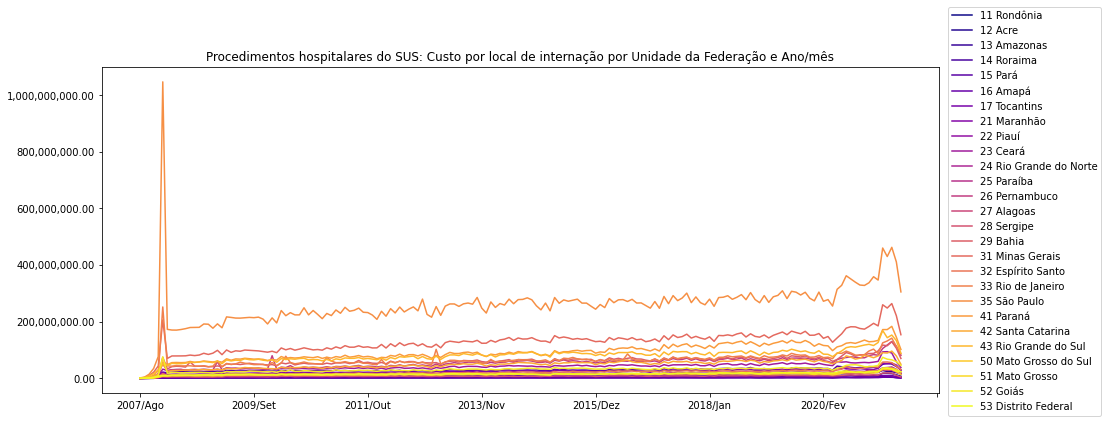

In [30]:
ax = usaveis.T.plot(figsize=(15,6), cmap = 'plasma')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS: Custo por local de internação por Unidade da Federação e Ano/mês")
ax.legend(loc=1, bbox_to_anchor=(1.2, 1.2))
plt.show()

## Desafio: adicionar uma coluna mostrando a região de cada estado

In [31]:
regiao = []
for i in range(27):
  if usaveis.index[i][0] == '1':
    regiao.append('Norte') 
  elif usaveis.index[i][0] == '2':
    regiao.append('Nordeste')
  elif usaveis.index[i][0] == '3':
    regiao.append('Sudeste')
  elif usaveis.index[i][0] == '4':
    regiao.append('Sul')
  else:
    regiao.append('Centro-Oeste')
  
# usaveis["Região"] = regiao
# cols = usaveis.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# usaveis = usaveis[cols]

In [32]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2721261.19,2844811

# Ordenação e série temporal

In [33]:
usaveis["Total"] = usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1046927423.80,173045862.19,170610712.81,170381376.55,172505271.19,175547012.50,179591516.72,180049847.37,180190976.54,191965709.27,191203869.46,177095026.47,192466571.03,178673694.74,217033832.95,215172428.64,212916020.81,212737062.37,214106868.79,215293136.77,214300043.33,216160854.31,209296748.93,192178644.40,213545203.71,195787926.41,239474479.68,221224536.51,232008764.40,224111847.69,224222550.01,249253705.77,224170156.75,239632539.36,225749095.70,...,286481016.87,291788572.30,279208974.38,286321418.71,295789304.45,277762291.06,302933615.99,278348663.52,267073072.83,292363093.11,268299673.70,288112089.02,293007729.86,309201953.43,281716110.68,307464109.69,304262824.10,294307129.46,304132810.33,282924527.81,273676445.82,304604287.43,272248732.48,278172606.85,255321714.81,314434195.45,328503334.47,362319893.79,350962262.30,339684332.88,329551515.09,328158231.54,337634767.13,358890655.96,347087924.65,460219472.23,430246974.20,462693607.78,411199321.73,305314678.98
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206460383.96,70301089.50,79119005.51,79046322.41,79268070.12,79626793.50,82215689.64,80374117.08,82415611.96,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100266328.26,91831325.37,97289703.07,95723396.53,100050008.70,98995348.51,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105501032.97,99666115.96,103377831.80,107844259.69,104341138.19,100525403.88,101943625.50,...,150711186.69,153607663.82,150268981.79,156810300.19,160555585.84,146099653.28,157302905.14,148172783.99,145462168.90,153279085.45,142715419.43,151999837.70,157959772.67,163691633.12,154208258.12,166818341.72,161885848.63,157462480.85,166197376.39,152186016.11,152501118.26,158295477.44,141469843.08,147783983.53,127474564.42,142760459.40,157361944.69,177506208.89,182247003.24,181803356.92,176155629.67,173787241.10,183341457.10,194365821.13,185286622.03,259898336.39,248331255.50,264091544.11,221215255.11,154160802.91
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,124731345.17,127089756.28,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127465820.78,132614796.58,124865873.14,134747469.46,127174381.95,126210733.35,133870601.68,126221140.81,113573832.72,122331688.11,116125740.39,114786294.43,97853998.41,111039301.38,115296102.37,124136076.97,126392053.97,123622630.56,129018959.73,135278610.14,129212733.39,130331150.55,133985247.28,172256797.21,172285056.67,183675374.74,145465735.37,102067382.02
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5106461

## Desafio: Deixar o gráfico mais bonito. A mensagem mais clara.

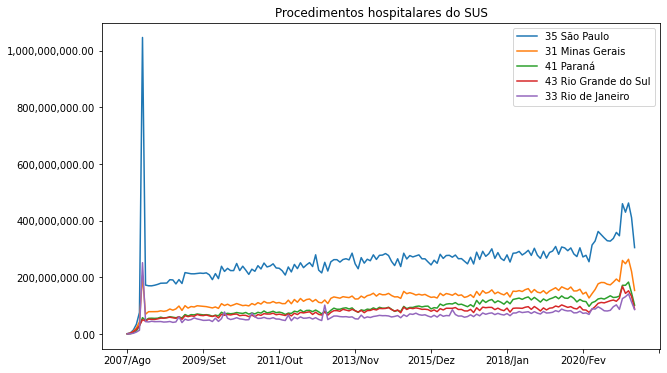

In [34]:
ax = ordenado_por_total.head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
ax.legend(loc=1)
plt.show()

## Desafio: Adicione seu estado aos 5 estados existentes e plote. Corte o ponto do gráfico mais alto.

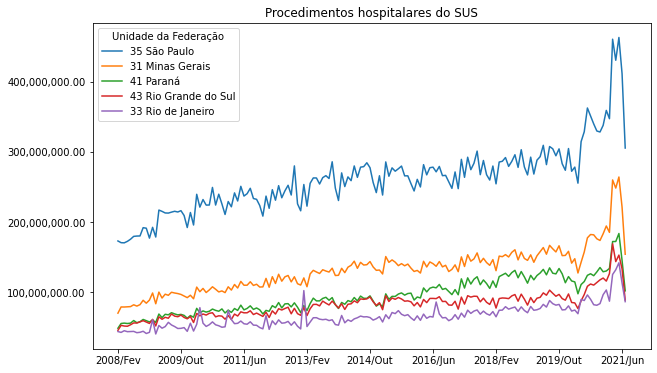

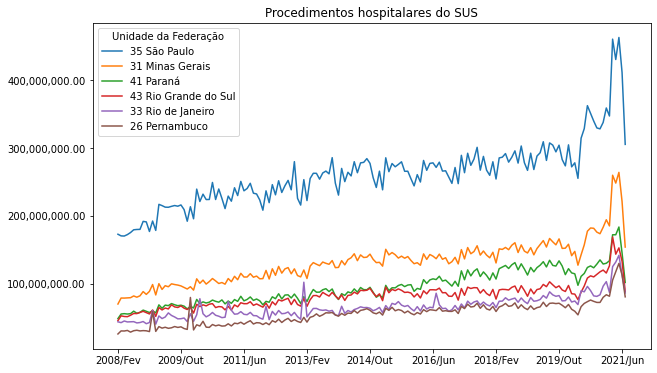

In [35]:
colunas_interessadas = ordenado_por_total.columns[6:]
ax = ordenado_por_total[colunas_interessadas].head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()

ordenado_por_total_e_PE = ordenado_por_total[colunas_interessadas].head(5).T
ordenado_por_total_e_PE['26 Pernambuco'] = ordenado_por_total[colunas_interessadas].T['26 Pernambuco']
ax = ordenado_por_total_e_PE.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()
# ordenado_por_total.T['26 Pernambuco'].plot(figsize=(10,6))


## Desafio: pesquisar os casos de dengue no Brasil e se reflete nos gastos

## Desafio: plotar só os estados do sudeste e ver se afetou com um pico em fev/2013 de forma similar nesses estados. E adicione seu estado ao estudo.

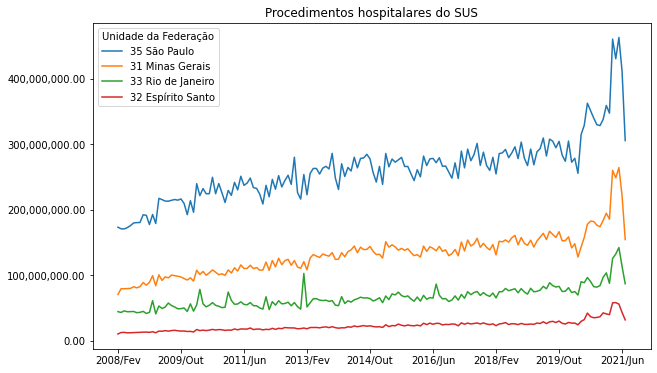

In [36]:
regiao = []
for i in range(27):
  if ordenado_por_total.index[i][0] == '1':
    regiao.append('Norte') 
  elif ordenado_por_total.index[i][0] == '2':
    regiao.append('Nordeste')
  elif ordenado_por_total.index[i][0] == '3':
    regiao.append('Sudeste')
  elif ordenado_por_total.index[i][0] == '4':
    regiao.append('Sul')
  elif ordenado_por_total.index[i][0] == '5':
    regiao.append('Centro-Oeste')

ordenado_mais_regiao = ordenado_por_total 
ordenado_mais_regiao["Região"] = regiao

sudeste = ordenado_mais_regiao.query('Região == "Sudeste"')
ax = sudeste[sudeste.columns[6:168]].T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()



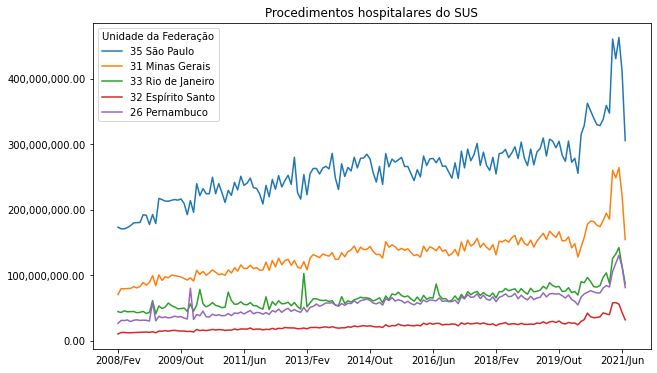

In [37]:
SE_e_PE = sudeste
SE_e_PE = SE_e_PE.append(ordenado_mais_regiao.loc['26 Pernambuco'])

ax = SE_e_PE[SE_e_PE.columns[6:168]].T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
plt.show()

#Fugindo de más práticas

In [38]:
ordenado_por_total = ordenado_por_total.drop("Região", axis=1)

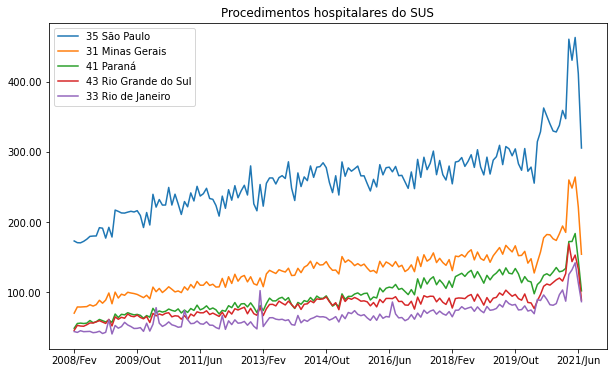

In [39]:
ordenado_por_total_milhoes = ordenado_por_total/1000000
ax = ordenado_por_total_milhoes[ordenado_por_total_milhoes.columns[6:]].head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Procedimentos hospitalares do SUS")
ax.legend(loc=0)
plt.show()

(0.0, 400.0)

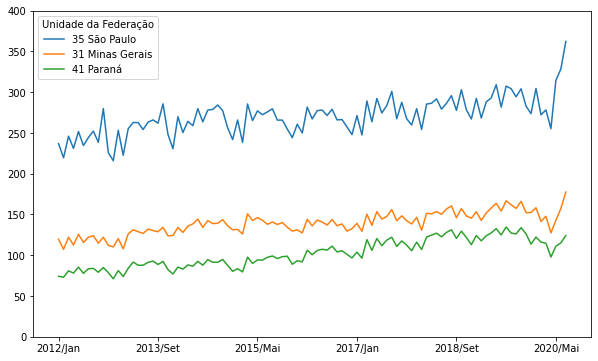

In [40]:
meses_filtrados = ordenado_por_total_milhoes.columns[53:156]
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,400)

(0.0, 500.0)

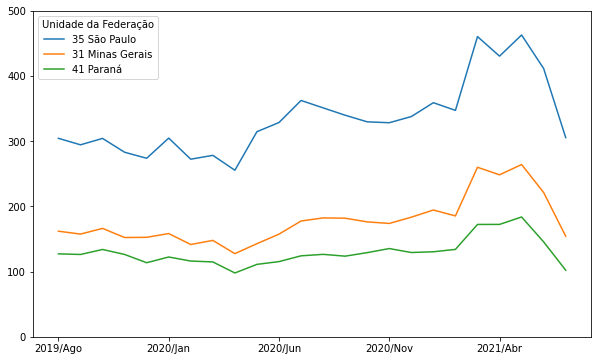

In [41]:
meses_filtrados = ordenado_por_total_milhoes.columns[-24:] #últimos 24 meses
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,500)

(0.0, 500.0)

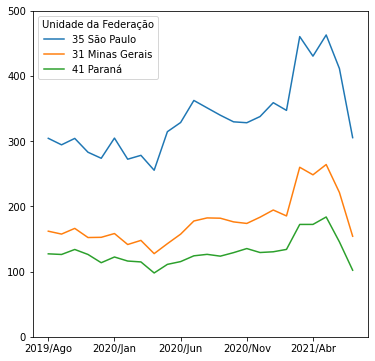

In [42]:
meses_filtrados = ordenado_por_total_milhoes.columns[-24:] #últimos 24 meses
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(6,6))
plt.ylim(0,500)

# Alternativas de vizualizações

In [43]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2021/Jul'

In [44]:
gasto_do_ultimo_mes = ordenado_por_total[mes_mais_recente]
gasto_do_ultimo_mes.head()/1000000

Unidade da Federação
35 São Paulo           305.31
31 Minas Gerais        154.16
41 Paraná              102.07
43 Rio Grande do Sul    88.90
33 Rio de Janeiro       86.68
Name: 2021/Jul, dtype: float64

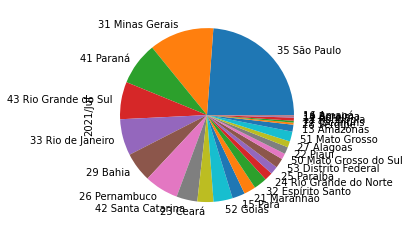

In [45]:
gasto_do_ultimo_mes.plot(kind='pie')

Horrores do gráfico de pizza:

- Legenda está horrível
- Número de fatias inacreditável

Já estamos com uma vantagem:
- o gráfico veio ordenado

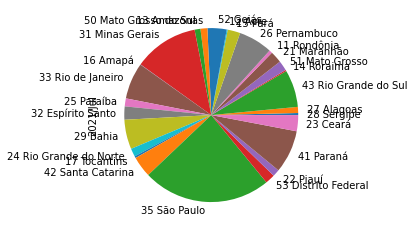

In [46]:
gasto_do_ultimo_mes.sample(frac=1).plot(kind='pie')

Horrores do gráfico de pizza:

- Legenda está horrível
- Número de fatias inacreditável
- não dá pra saber a ordem do gráfico
- cores repetidas
- muito ruim para definir ordem
- péssimo para comparar

## Desafio: Compare preço total em relação com seu estado

In [47]:
gasto_do_ultimo_mes / gasto_do_ultimo_mes.loc["26 Pernambuco"]

Unidade da Federação
35 São Paulo             3.77
31 Minas Gerais          1.91
41 Paraná                1.26
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.07
29 Bahia                 0.87
26 Pernambuco            1.00
42 Santa Catarina        0.62
23 Ceará                 0.47
52 Goiás                 0.56
15 Pará                  0.37
21 Maranhão              0.35
32 Espírito Santo        0.39
24 Rio Grande do Norte   0.24
25 Paraíba               0.23
53 Distrito Federal      0.29
50 Mato Grosso do Sul    0.17
22 Piauí                 0.21
27 Alagoas               0.18
51 Mato Grosso           0.29
13 Amazonas              0.20
28 Sergipe               0.06
17 Tocantins             0.06
11 Rondônia              0.09
12 Acre                  0.03
14 Roraima               0.04
16 Amapá                 0.01
Name: 2021/Jul, dtype: float64

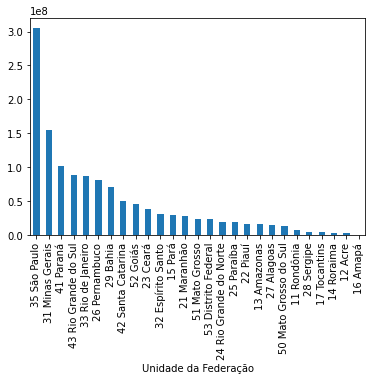

In [48]:
gasto_do_ultimo_mes.sort_values(ascending=False).plot(kind='bar')

## Desafio: documentação do matplotlib e pandas para colocar grid no gráfico

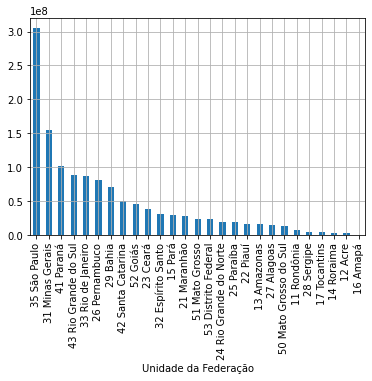

In [49]:
gasto_do_ultimo_mes.sort_values(ascending=False).plot(kind='bar', grid=True)

## Desafio: gasto do gráfico de barra em função ao seu estado

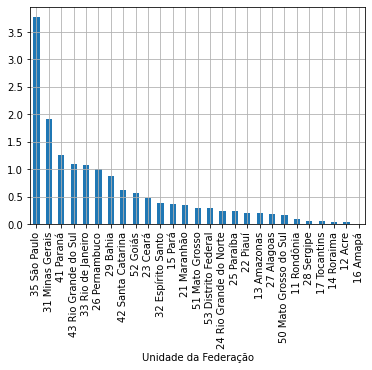

In [50]:
var_sobre_PE = gasto_do_ultimo_mes / gasto_do_ultimo_mes.loc["26 Pernambuco"]
var_sobre_PE.sort_values(ascending=False).plot(kind='bar', grid=True)

## Desafio: gasto por população de dois estados. Escolha dois estados. Gráfico de barras.

### Importando dados de população do Brasil

In [51]:
pop = pd.read_csv("/content/pop_filtrado.csv", sep = ";", thousands=".")
pop.head()

,Unidades da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Brasil,172385826,174632960,176871437,181581024,184184264,186770562,183989711,189612814,191480630,190747855,192379287,193946886,201032714,202768562,204450649,206081432,207660929,208494900,210147125,211755692,213317639
1,Região Norte,13245084,13504599,13784881,14373260,14698878,15022060,14623317,15142684,15359608,15880839,16095187,16318163,16983484,17231027,17472636,17707783,17936201,18182253,18430980,18672591,18906962
2,Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460,1815278
3,Acre,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470,906876
4,Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714,4269995


In [52]:
pop = pop.set_index("Unidades da Federação")
pop.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Unidades da Federação,,,,,,,,,,,,,,,,,,,,,
Brasil,172385826,174632960,176871437,181581024,184184264,186770562,183989711,189612814,191480630,190747855,192379287,193946886,201032714,202768562,204450649,206081432,207660929,208494900,210147125,211755692,213317639
Região Norte,13245084,13504599,13784881,14373260,14698878,15022060,14623317,15142684,15359608,15880839,16095187,16318163,16983484,17231027,17472636,17707783,17936201,18182253,18430980,18672591,18906962
Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460,1815278
Acre,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470,906876
Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714,4269995


### Separando população de São Paulo e Pernambuco em variáveis

In [53]:
mes_pop = pop.columns[8:]
pop_filt = pop[mes_pop]
pop_SP = pop_filt.loc['São Paulo']
pop_PE = pop_filt.loc['Pernambuco']

### Manipulando dados dos procedimentos hospitalares
1- Recortando DataFrame para anos jan/2009-jul/2021

In [54]:
Proc_Hosp = dados2.replace('-', '0')
Proc_Hosp = Proc_Hosp.set_index("Unidade da Federação")
mes_pop = Proc_Hosp.columns[138:289]
Proc_Hosp = Proc_Hosp[mes_pop]
Proc_Hosp.head()

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,4690112.05,4319488.17,4778472.22,4202805.84,4372265.77,4389025.81,4045339.34,4472721.53,4417486.20,4859795.35,4590008.82,...,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8328381.43,8431334.62,7251287.20,7491953.39,8962121.79,11069824.97,10608659.34,11578639.50,9017298.72,8280299.95,8908581.36,9462158.24,10036160.84,10558973.83,17936150.41,17544666.46,17200302.44,12586384.26,7427454.01
12 Acre,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,2719044.65,2814550.89,2923529.36,2804546.95,2773202.98,2711168.25,2765187.44,2804275.11,2460383.33,3062146.31,2780466.09,...,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470648.64,3267918.69,3497348.48,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01
13 Amazonas,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,9966359.03,9972847.16,9965893.92,9861030.02,10206641.46,10735915.35,8702766.18,10037664.68,8977728.10,11048686.39,10472290.40,...,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14817551.60,16384086.61,19629685.10,18438092.88,19305534.94,18698372.12,18639116.65,18750332.19,20587412.38,21911210.94,27379130.17,22308502.15,27753143.45,24316090.15,23582931.95,20503366.04,16487221.12
14 Roraima,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,1770324.67,1646157.39,1656379.50,1802450.34,1856131.44,1655521.98,1620351.06,1605536.38,1625159.47,17

2- Calculando média anual do DataFrame

In [55]:
meses_Proc_Hosp = []
j=0
for i in range(13):
  meses_Proc_Hosp.append(Proc_Hosp.columns[j:j+12].tolist())
  j+=12

j=2009
Proc_Hosp_meses = Proc_Hosp
for i in range(13):
  Proc_Hosp_meses[str(j)] = Proc_Hosp[meses_Proc_Hosp[i]].T.mean()
  j+=1

Proc_Hosp_meses = Proc_Hosp_meses[Proc_Hosp_meses.columns[151:]]
Proc_Hosp_meses.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Unidade da Federação,,,,,,,,,,,,,
11 Rondônia,3677817.70,4427017.73,4479232.68,4358421.26,5560790.34,6854824.25,7369002.26,7635276.84,8042011.05,8582389.71,8846500.34,9115878.38,13327156.04
12 Acre,2167568.67,2452057.73,2778669.90,2843288.37,2815335.95,2985682.65,3101025.42,3241594.67,3206753.17,2916995.56,2964647.08,3374905.93,4321118.89
13 Amazonas,8874276.31,9514648.10,10021942.83,10243071.67,10366240.86,10471084.75,12662660.83,12382893.72,13491196.80,14892281.98,15697681.85,18192518.30,23190055.00
14 Roraima,1410823.25,1751623.94,1597297.11,1677618.38,1749413.43,1798447.37,2021151.40,2261175.49,2620584.07,2785624.39,2881339.87,3072105.70,3904464.33
15 Pará,26544531.82,26956286.18,27096465.01,26173104.47,28196737.32,29055716.68,29210662.30,30257858.59,32350059.25,34357026.75,34002661.77,37522389.26,42944942.55


3-Filtrando os custos para São Paulo e Pernambuco

In [56]:
Proc_Hosp_SP = Proc_Hosp_meses.loc['35 São Paulo']
Proc_Hosp_PE = Proc_Hosp_meses.loc['26 Pernambuco']

4-Calculando o Custo per capta de cada mês e concatenando DataSeries em um DataFrame

In [57]:
Custo_Per_cap_SP = Proc_Hosp_SP.rename("São Paulo") / pop_SP
Custo_Per_cap_PE = Proc_Hosp_PE.rename("Pernambuco") / pop_PE
Custo_Per_cap = pd.concat([Custo_Per_cap_SP.T, Custo_Per_cap_PE.T], axis=1)
Custo_Per_cap.head()

,São Paulo,Pernambuco
2009,5.01,4.20
2010,5.45,4.74
2011,5.60,4.72
2012,5.72,5.03
2013,5.85,5.78


5- Plot dos dados

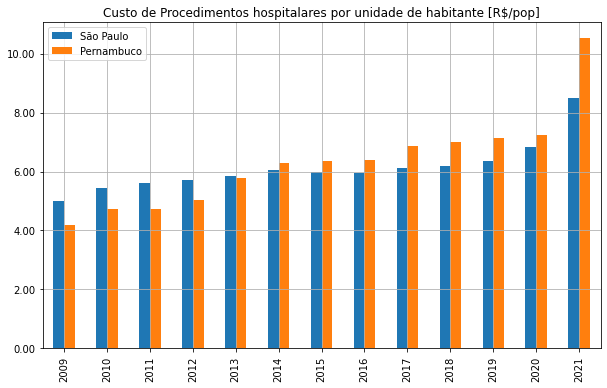

In [58]:
ax = Custo_Per_cap.plot(figsize=(10,6), grid=True, kind='bar')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Custo de Procedimentos hospitalares por unidade de habitante [R$/pop]")
ax.legend(loc=0)
plt.show()

## Desafio: Explore e levante hipóteses e perguntas.

## Super Desafio: Escolha outro valor fora Valor aprovado no TABNET e explore.